In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind, t
from matplotlib.ticker import PercentFormatter
from pathlib import Path

In [2]:
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
sns.set_theme(style="darkgrid")

# Cleaning and formatting

In [4]:
DATA_DIR = Path("./data").resolve()

qvi_data = DATA_DIR / "QVI_cleaned.csv"

print(qvi_data)

D:\Users\Esperine\Workspace3\esper-datalab-main\forage_quantium\data\QVI_cleaned.csv


In [5]:
df_main = pd.read_csv(qvi_data, parse_dates=True)
df_main.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,PROD_UPRICE,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag,2.0,11.8,380.0,5.9,SMITHS,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn Friedchicken,2.0,7.4,134.0,3.7,PRINGLES,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55.0,55073.0,48884.0,91.0,Ccs Tasty Cheese,2.0,4.2,175.0,2.1,CCS,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil Pesto,2.0,10.8,175.0,5.4,KETTLE,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Light Tangy,2.0,6.6,175.0,3.3,THINS,MIDAGE SINGLES/COUPLES,Budget


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246741 entries, 0 to 246740
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              246741 non-null  object 
 1   STORE_NBR         246740 non-null  float64
 2   LYLTY_CARD_NBR    246740 non-null  float64
 3   TXN_ID            246740 non-null  float64
 4   PROD_NBR          246740 non-null  float64
 5   PROD_NAME         246740 non-null  object 
 6   PROD_QTY          246740 non-null  float64
 7   TOT_SALES         246740 non-null  float64
 8   PROD_WT           246740 non-null  float64
 9   PROD_UPRICE       246740 non-null  float64
 10  PROD_BRAND        246740 non-null  object 
 11  LIFESTAGE         246740 non-null  object 
 12  PREMIUM_CUSTOMER  246740 non-null  object 
dtypes: float64(8), object(5)
memory usage: 24.5+ MB


In [7]:
df_main["DATE"] = pd.to_datetime(df_main["DATE"])
df_main = df_main.astype({
    "STORE_NBR": "Int64",
    "LYLTY_CARD_NBR": "Int64",
    "TXN_ID": "Int64",
    "PROD_NBR": "Int64",
    "PROD_QTY": "Int64",
    "PROD_WT": "Int64"
})
df_main["YEARMONTH"] = df_main["DATE"].dt.to_period("M")
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246741 entries, 0 to 246740
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246741 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  Int64         
 2   LYLTY_CARD_NBR    246740 non-null  Int64         
 3   TXN_ID            246740 non-null  Int64         
 4   PROD_NBR          246740 non-null  Int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  Int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PROD_WT           246740 non-null  Int64         
 9   PROD_UPRICE       246740 non-null  float64       
 10  PROD_BRAND        246740 non-null  object        
 11  LIFESTAGE         246740 non-null  object        
 12  PREMIUM_CUSTOMER  246740 non-null  object        
 13  YEARMONTH         246741 non-null  period[M]     
dtypes: I

In [8]:
df_main.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WT,PROD_UPRICE,PROD_BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,2018-07-01,47,47142,42540,14,Smiths Crnkle Chip Orgnl Big Bag,2,11.8,380,5.9,SMITHS,MIDAGE SINGLES/COUPLES,Budget,2018-07
1,2018-07-01,55,55073,48884,99,Pringles Sthrn Friedchicken,2,7.4,134,3.7,PRINGLES,MIDAGE SINGLES/COUPLES,Budget,2018-07
2,2018-07-01,55,55073,48884,91,Ccs Tasty Cheese,2,4.2,175,2.1,CCS,MIDAGE SINGLES/COUPLES,Budget,2018-07
3,2018-07-01,58,58351,54374,102,Kettle Mozzarella Basil Pesto,2,10.8,175,5.4,KETTLE,MIDAGE SINGLES/COUPLES,Budget,2018-07
4,2018-07-01,68,68193,65598,44,Thins Chips Light Tangy,2,6.6,175,3.3,THINS,MIDAGE SINGLES/COUPLES,Budget,2018-07


In [9]:
df_main.dropna(inplace=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 246740
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  Int64         
 2   LYLTY_CARD_NBR    246740 non-null  Int64         
 3   TXN_ID            246740 non-null  Int64         
 4   PROD_NBR          246740 non-null  Int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  Int64         
 7   TOT_SALES         246740 non-null  float64       
 8   PROD_WT           246740 non-null  Int64         
 9   PROD_UPRICE       246740 non-null  float64       
 10  PROD_BRAND        246740 non-null  object        
 11  LIFESTAGE         246740 non-null  object        
 12  PREMIUM_CUSTOMER  246740 non-null  object        
 13  YEARMONTH         246740 non-null  period[M]     
dtypes: Int64(

# Analysis proper

## Setup monthly measures of metrics per store

In [10]:
# Total transactions per month for every store

monthly_trans = df_main.pivot_table(
    index="STORE_NBR", 
    columns="YEARMONTH", 
    aggfunc="size", 
    fill_value=0
).rename_axis(None, axis=1)

print(monthly_trans.shape)
monthly_trans

(271, 12)


,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
1,49,41,59,40,45,40,35,51,47,40,48,40
2,38,39,33,41,34,35,43,31,41,45,47,38
3,134,124,118,117,111,124,114,134,126,102,113,117
4,152,144,135,148,127,128,156,97,127,130,112,129
5,111,99,122,98,103,112,108,103,86,101,94,117
...,...,...,...,...,...,...,...,...,...,...,...,...
268,50,50,30,46,46,39,35,36,44,45,48,38
269,131,127,117,142,125,119,133,123,117,129,117,114
270,124,143,115,104,121,140,146,116,137,122,119,114


In [11]:
# Check if there are stores with little to no sales

monthly_trans[((monthly_trans == 0) | (monthly_trans == np.nan)).any(axis=1)]

,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
STORE_NBR,,,,,,,,,,,,
11,0,0,0,1,0,1,0,0,0,0,0,0
31,0,0,1,0,1,0,0,0,0,0,0,0
44,4,0,3,5,4,7,5,3,5,3,6,8
76,0,0,0,1,0,0,0,0,0,0,0,0
85,2,0,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,1,0,0,0
117,0,4,3,6,6,8,0,2,2,4,4,2
177,3,6,5,1,10,2,9,2,4,0,1,8
193,0,0,0,0,0,0,1,1,0,0,0,1


In [12]:
drop_stores = monthly_trans[((monthly_trans == 0) | (monthly_trans == np.nan)).any(axis=1)].index
print(drop_stores, drop_stores.shape)

Index([11, 31, 44, 76, 85, 92, 117, 177, 193, 206, 218, 252], dtype='Int64', name='STORE_NBR') (12,)


In [13]:
monthly_trans = monthly_trans.drop(index=drop_stores).reset_index()
print(monthly_trans.shape)
monthly_trans

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,49,41,59,40,45,40,35,51,47,40,48,40
1,2,38,39,33,41,34,35,43,31,41,45,47,38
2,3,134,124,118,117,111,124,114,134,126,102,113,117
3,4,152,144,135,148,127,128,156,97,127,130,112,129
4,5,111,99,122,98,103,112,108,103,86,101,94,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,268,50,50,30,46,46,39,35,36,44,45,48,38
255,269,131,127,117,142,125,119,133,123,117,129,117,114
256,270,124,143,115,104,121,140,146,116,137,122,119,114
257,271,117,91,104,106,108,108,106,93,96,97,117,123


In [14]:
# Save list of all active stores for later use and reference

all_stores = monthly_trans["STORE_NBR"]
all_stores

0        1
1        2
2        3
3        4
4        5
      ... 
254    268
255    269
256    270
257    271
258    272
Name: STORE_NBR, Length: 259, dtype: Int64

In [15]:
# Total sales per month for every store

monthly_sales = df_main.pivot_table(
    values="TOT_SALES",
    index="STORE_NBR", 
    columns="YEARMONTH",
    aggfunc="sum",
    fill_value=0
).rename_axis(None, axis=1).drop(index=drop_stores).reset_index()

print(monthly_sales.shape)
monthly_sales.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,188.9,168.40,268.1,175.4,184.8,160.6,149.7,194.7,185.2,177.4,207.10,163.6
1,2,140.5,180.90,133.9,160.1,143.3,129.2,158.7,136.8,174.0,173.4,179.80,143.4
2,3,1164.9,998.15,1011.3,1017.5,936.6,1075.7,980.3,1146.7,1083.6,843.5,905.10,986.3
3,4,1318.3,1188.10,1168.0,1275.0,1089.6,1134.6,1402.6,832.4,1110.8,1159.1,885.75,1145.0
4,5,763.8,654.50,875.2,740.6,707.0,800.2,772.6,706.4,603.4,684.4,665.50,828.6


In [16]:
# Total product units sold per month for every store

monthly_units_sold = df_main.pivot_table(
    values="PROD_QTY",
    index="STORE_NBR", 
    columns="YEARMONTH",
    aggfunc="sum",
    fill_value=0
).rename_axis(None, axis=1).drop(index=drop_stores).reset_index()

print(monthly_units_sold.shape)
monthly_units_sold.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,58,52,71,51,55,48,41,58,56,52,62,50
1,2,43,50,36,43,38,37,47,36,46,50,53,40
2,3,263,237,230,231,213,246,222,262,247,192,213,228
3,4,302,276,270,296,254,256,311,194,254,259,202,258
4,5,222,189,244,196,206,224,216,206,172,202,184,234


In [17]:
# Total unique transactions per month for every store (refers to total number of customers in the store)

monthly_utrans = df_main.pivot_table(
    values="LYLTY_CARD_NBR",
    index="STORE_NBR", 
    columns="YEARMONTH",
    aggfunc="nunique",
    fill_value=0
).rename_axis(None, axis=1).drop(index=drop_stores).reset_index()

print(monthly_utrans.shape)
monthly_utrans.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,47,41,57,39,44,37,35,49,43,39,43,39
1,2,36,35,32,39,33,32,41,28,40,43,45,36
2,3,108,106,102,103,95,107,97,113,106,85,100,102
3,4,121,118,117,119,109,102,125,86,111,112,94,116
4,5,86,85,99,81,80,90,84,85,76,78,78,95


In [18]:
# Average number of transactions per customer per month for every store

monthly_avg_trans_per_cust = (
    df_main.groupby(["STORE_NBR", "YEARMONTH"])["LYLTY_CARD_NBR"]
        .agg(["size", "nunique"])
        .pipe(lambda df: df["size"].div(df["nunique"], fill_value=0))
        .unstack()
        .rename_axis(None, axis=1)
        .drop(index=drop_stores)
        .reset_index()
)

print(monthly_avg_trans_per_cust.shape)
monthly_avg_trans_per_cust.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,1.042553,1.0,1.035088,1.025641,1.022727,1.081081,1.0,1.040816,1.093023,1.025641,1.116279,1.025641
1,2,1.055556,1.114286,1.03125,1.051282,1.030303,1.09375,1.04878,1.107143,1.025,1.046512,1.044444,1.055556
2,3,1.240741,1.169811,1.156863,1.135922,1.168421,1.158879,1.175258,1.185841,1.188679,1.2,1.13,1.147059
3,4,1.256198,1.220339,1.153846,1.243697,1.165138,1.254902,1.248,1.127907,1.144144,1.160714,1.191489,1.112069
4,5,1.290698,1.164706,1.232323,1.209877,1.2875,1.244444,1.285714,1.211765,1.131579,1.294872,1.205128,1.231579


In [19]:
# Average number of purchased product per customer per month for every store

monthly_avg_units_per_cust = (
    df_main.groupby(["STORE_NBR", "YEARMONTH"])
        .agg(
            total_qty=("PROD_QTY", "sum"),
            unique_cust=("LYLTY_CARD_NBR", "nunique")
        )
        .pipe(lambda df: df["total_qty"].div(df["unique_cust"], fill_value=0))
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .drop(index=drop_stores)
        .reset_index()
)

print(monthly_avg_units_per_cust.shape)
monthly_avg_units_per_cust.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,1.234043,1.268293,1.245614,1.307692,1.25,1.297297,1.171429,1.183673,1.302326,1.333333,1.44186,1.282051
1,2,1.194444,1.428571,1.125,1.102564,1.151515,1.15625,1.146341,1.285714,1.15,1.162791,1.177778,1.111111
2,3,2.435185,2.235849,2.254902,2.242718,2.242105,2.299065,2.28866,2.318584,2.330189,2.258824,2.13,2.235294
3,4,2.495868,2.338983,2.307692,2.487395,2.330275,2.509804,2.488,2.255814,2.288288,2.3125,2.148936,2.224138
4,5,2.581395,2.223529,2.464646,2.419753,2.575,2.488889,2.571429,2.423529,2.263158,2.589744,2.358974,2.463158


In [20]:
# Average number of purchased product per transactions per month for every store

monthly_avg_units_per_trans = (
    df_main.groupby(["STORE_NBR", "YEARMONTH"])["PROD_QTY"]
        .mean()
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .drop(index=drop_stores)
        .reset_index()
)

print(monthly_avg_units_per_trans.shape)
monthly_avg_units_per_trans.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,1.183673,1.268293,1.20339,1.275,1.222222,1.2,1.171429,1.137255,1.191489,1.3,1.291667,1.25
1,2,1.131579,1.282051,1.090909,1.04878,1.117647,1.057143,1.093023,1.16129,1.121951,1.111111,1.12766,1.052632
2,3,1.962687,1.91129,1.949153,1.974359,1.918919,1.983871,1.947368,1.955224,1.960317,1.882353,1.884956,1.948718
3,4,1.986842,1.916667,2.0,2.0,2.0,2.0,1.99359,2.0,2.0,1.992308,1.803571,2.0
4,5,2.0,1.909091,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.957447,2.0


In [21]:
# Average price per unit per month for every store

monthly_avg_uprice = (
    df_main.groupby(["STORE_NBR", "YEARMONTH"])
        .agg(
            total_sales=("TOT_SALES", "sum"),
            total_qty=("PROD_QTY", "sum")
        )
        .pipe(lambda df: df["total_sales"].div(df["total_qty"], fill_value=0))
        .unstack(fill_value=0)
        .rename_axis(None, axis=1)
        .drop(index=drop_stores)
        .reset_index()
)

print(monthly_avg_uprice.shape)
monthly_avg_uprice.head()

(259, 13)


,STORE_NBR,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06
0,1,3.256897,3.238462,3.776056,3.439216,3.36,3.345833,3.65122,3.356897,3.307143,3.411538,3.340323,3.272
1,2,3.267442,3.618,3.719444,3.723256,3.771053,3.491892,3.376596,3.8,3.782609,3.468,3.392453,3.585
2,3,4.429278,4.211603,4.396957,4.404762,4.397183,4.372764,4.415766,4.376718,4.387045,4.393229,4.249296,4.325877
3,4,4.365232,4.30471,4.325926,4.307432,4.289764,4.432031,4.509968,4.290722,4.373228,4.47529,4.384901,4.437984
4,5,3.440541,3.462963,3.586885,3.778571,3.432039,3.572321,3.576852,3.429126,3.50814,3.388119,3.616848,3.541026


In [22]:
# Create summary for later use and reference

all_metrics = [
    monthly_trans,
    monthly_sales,
    monthly_units_sold,
    monthly_utrans,
    monthly_avg_trans_per_cust,
    monthly_avg_units_per_cust,
    monthly_avg_units_per_trans,
    monthly_avg_uprice
]

column_names = [
    "TRANS", 
    "SALES", 
    "UNITS_SOLD", 
    "UNIQUE_TRANS", 
    "TRANS_PER_CUST", 
    "UNITS_SOLD_PER_CUST",
    "UNITS_SOLD_PER_TRANS",
    "UNIT_PRICE"
]

store_metrics_summary = pd.concat(
    [df.set_index("STORE_NBR").mean(axis=1) for df in all_metrics],
    axis=1,
    keys=column_names
).reset_index()

trial_stores = (77, 86, 88)
summary_metrics_trial_stores = store_metrics_summary[store_metrics_summary["STORE_NBR"].isin(trial_stores)]
summary_metrics_other_stores = store_metrics_summary[~store_metrics_summary["STORE_NBR"].isin(trial_stores)]

In [23]:
summary_metrics_trial_stores.round(3)

,STORE_NBR,TRANS,SALES,UNITS_SOLD,UNIQUE_TRANS,TRANS_PER_CUST,UNITS_SOLD_PER_CUST,UNITS_SOLD_PER_TRANS,UNIT_PRICE
72,77,44.083,236.600,67.833,42.167,1.047,1.616,1.543,3.497
80,86,119.917,834.229,238.917,97.583,1.23,2.45,1.992,3.493
82,88,148.833,1287.154,295.333,121.500,1.225,2.431,1.984,4.358


In [24]:
summary_metrics_other_stores.round(3)

,STORE_NBR,TRANS,SALES,UNITS_SOLD,UNIQUE_TRANS,TRANS_PER_CUST,UNITS_SOLD_PER_CUST,UNITS_SOLD_PER_TRANS,UNIT_PRICE
0,1,44.583,185.325,54.5,42.750,1.042,1.276,1.225,3.396
1,2,38.750,154.500,43.25,36.667,1.059,1.183,1.116,3.583
2,3,119.500,1012.471,232.0,102.000,1.171,2.273,1.94,4.363
3,4,132.083,1142.438,261.0,110.833,1.19,2.349,1.974,4.375
4,5,104.500,733.517,207.917,84.750,1.233,2.452,1.989,3.528
...,...,...,...,...,...,...,...,...,...
254,268,42.250,201.821,56.833,40.250,1.05,1.416,1.346,3.548
255,269,124.500,872.558,247.0,98.833,1.259,2.498,1.984,3.53
256,270,125.083,876.588,248.25,96.667,1.295,2.573,1.986,3.533
257,271,105.500,746.025,208.75,86.083,1.227,2.427,1.979,3.573


## Determine control stores

+ The trial period of the new layout occurred from the **start of February to the end of April 2019.**
+ The trial stores are the following: Store **77, 86 and 88.**

In [25]:
def store_correlation(trial_store_nbr, select_metric):
    """Measure similarity of stores based on trend. Values close to +1 means the two stores are nearly identical."""
    # Get all months before the trial period
    pre_trial_period = df_main["YEARMONTH"].unique()[:7]
    
    # List all dataframes for each relevant metric
    all_metrics = [
        monthly_trans,
        monthly_sales,
        monthly_units_sold,
        monthly_utrans,
        monthly_avg_trans_per_cust,
        monthly_avg_units_per_cust,
        monthly_avg_units_per_trans,
        monthly_avg_uprice
    ]

    # Get dataframe metric to use for correlation then slicing the pre-trial period
    df_metric = all_metrics[select_metric].set_index("STORE_NBR")[pre_trial_period]
    trial_store_data = df_metric.loc[trial_store_nbr]

    # To avoid RuntimeWarnings when calculating correlation
    if select_metric in [4, 5]:
        variances = df_metric.std(axis=1)
        df_metric = df_metric.loc[variances > 0]

    # Calculate correlation values of trial store for every other store
    corr_values = df_metric.corrwith(trial_store_data, axis=1)

    # Format result into dataframe
    df_results = (
        corr_values.to_frame(name="CORR")
            .reset_index()
            .rename(columns={"STORE_NBR": "CTRL_STORE"})
            .assign(TRIAL_STORE=trial_store_nbr)
    )

    # Filter correlation value of trial store to itself
    df_results = df_results[df_results["CTRL_STORE"] != trial_store_nbr]

    return df_results.reindex(columns=["TRIAL_STORE", "CTRL_STORE", "CORR"])


def store_magnitude_score(trial_store_nbr, select_metric):
    """Measure similarity of stores based on volume. Values close to 1 means the two stores are nearly identical."""
    # Get all months before the trial period
    pre_trial_period = df_main["YEARMONTH"].unique()[:7]
    
    # List all dataframes for each relevant metric
    all_metrics = [
        monthly_trans,
        monthly_sales,
        monthly_units_sold,
        monthly_utrans,
        monthly_avg_trans_per_cust,
        monthly_avg_units_per_cust,
        monthly_avg_units_per_trans,
        monthly_avg_uprice
    ]

    # Get dataframe metric to use for calculation
    df_metric = all_metrics[select_metric].set_index("STORE_NBR")[pre_trial_period]
    trial_store_data = df_metric.loc[trial_store_nbr]

    # Calculate absolute differences between each store and trial store
    df_abs_diff = df_metric.sub(trial_store_data).abs()

    # Get minimum and maximum values from absolute differences
    min_mag, max_mag = df_abs_diff.min(), df_abs_diff.max()

    # Calculate standard score and get average across all months
    std_mag_measure = 1 - (df_abs_diff - min_mag) / (max_mag - min_mag)
    mag_values = std_mag_measure.mean(axis=1)

    # Format result into dataframe
    df_results = (
        mag_values.to_frame(name="MAG_SCORE")
            .reset_index()
            .rename(columns={"STORE_NBR": "CTRL_STORE"})
            .assign(TRIAL_STORE=trial_store_nbr)
    )

    # Filter magnitude score value of trial store to itself
    df_results = df_results[df_results["CTRL_STORE"] != trial_store_nbr]

    return df_results.reindex(columns=["TRIAL_STORE", "CTRL_STORE", "MAG_SCORE"])

In [26]:
def composite_score(trial_store_nbr, test_metrics):
    """Helper function to calculate composite score based on correlation and magnitude given considered metrics"""
    # Metrics that are considered the most impactful based on general retail practices
    relevant_metrics = test_metrics
    total_score = pd.Series(0, index=all_stores.index)

    # Calculate total score based on correlation and magnitude score of each metric
    for m in relevant_metrics:
        corr = store_correlation(trial_store_nbr, m)["CORR"]
        mag = store_magnitude_score(trial_store_nbr, m)["MAG_SCORE"]

        total_score += (0.5 * corr + 0.5 * mag) * (1 / len(relevant_metrics))

    # Create the dataframe to return
    df_composite_score = pd.DataFrame({
        "TRIAL_STORE": trial_store_nbr,
        "CTRL_STORE": all_stores,
        "CTRL_SCORE": total_score
    })

    return df_composite_score

In [27]:
# Considering only Metrics 1, 3

for store in trial_stores:
    print(f"Trial Store - {store}")
    print(composite_score(store, test_metrics=[1, 3]).sort_values(by="CTRL_SCORE", ascending=False).head(10))

print("---")

# Considering only Metrics 1, 3, 7, 8

for store in trial_stores:
    print(f"Trial Store - {store}")
    print(composite_score(store, test_metrics=[1, 3, 6, 7]).sort_values(by="CTRL_SCORE", ascending=False).head(10))

Trial Store - 77
     TRIAL_STORE  CTRL_STORE  CTRL_SCORE
220           77         233    0.979046
46            77          50    0.878368
32            77          35    0.847766
240           77         254    0.834238
79            77          84    0.817511
38            77          41    0.808890
159           77         167    0.807580
49            77          53    0.801560
25            77          27    0.792512
15            77          17    0.781992
Trial Store - 86
     TRIAL_STORE  CTRL_STORE  CTRL_SCORE
147           86         155    0.908037
107           86         114    0.874358
130           86         138    0.823850
52            86          56    0.760301
120           86         128    0.748532
73            86          78    0.744810
212           86         225    0.740871
139           86         147    0.736058
210           86         223    0.727431
218           86         231    0.725892
Trial Store - 88
     TRIAL_STORE  CTRL_STORE  CTRL_SCORE
224   

**Remarks**
+ Control Stores
    + Store 77 -> Try **Store 167 or 233**
    + Store 86 -> Try **Store 155**
    + Store 88 -> Try **Store 69 or 237**
+ We could verify further which control store is the most suitable for each trial store with more analysis and visualizations.

## Pre-trial trend visuals

To simplify our approach, let's only consider performance based on total sales and total customers for each of the trial stores.

In [28]:
def plot_pretrial_trends(trial_store, control_store, metric=0):
    # Get all months before the trial period (February to April 2019)
    pre_trial_period = df_main["YEARMONTH"].unique()[:7]

    # Select metric to consider
    relevant_metrics = [
        monthly_sales, 
        monthly_utrans, 
        monthly_avg_units_per_trans, 
        monthly_avg_uprice
    ]
    df_metric = relevant_metrics[metric]

    # Setup working dataframe for plotting
    pre_trial_trend = df_metric.set_index("STORE_NBR").loc[[trial_store, control_store], pre_trial_period].transpose()
    pre_trial_trend.columns = ["Trial", "Control"]
    pre_trial_trend["Others"] = df_metric.loc[~df_metric["STORE_NBR"].isin([trial_store, control_store]), pre_trial_period].mean().round(1)
    pre_trial_trend.index = pre_trial_trend.index.astype(str)
    print(pre_trial_trend)

    # Draw plot
    fig, ax = plt.subplots(figsize=(13, 6))
    sns.lineplot(
        data=pre_trial_trend[["Trial", "Control", "Others"]],
        palette="viridis",
        lw=2, 
        ax=ax)

    # Setup plot legends
    handles, labels = ax.get_legend_handles_labels()
    clean_labels = {
        "Trial": f"Trial ({trial_store})",
        "Control": f"Control ({control_store})",
        "Others": "Avg. Other Stores"
    }
    new_labels = [clean_labels.get(l, l) for l in labels]
    ax.legend(
        handles=handles,
        labels=new_labels,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),
        ncol=3,
        frameon=False
    )

    # Setup labels
    plot_title_mapper = {
        0: "Total Sales",
        1: "Total Customers",
        2: "Avg Units per Transaction",
        3: "Avg Sales per Unit"
    }
    ax.set_title(f"Pre-Trial Store Trend - {plot_title_mapper.get(metric, "NaN")}")

    fig.tight_layout()

    metric_name = plot_title_mapper.get(metric, "NaN").replace(" ", "_").lower()
    fig.savefig(f"./static/assessment/pttrend_{metric_name}_ts{trial_store}_cs{control_store}.jpg", bbox_inches="tight", dpi=200)

         Trial  Control  Others
2018-07  268.4    215.3   599.1
2018-08  247.5    201.0   571.4
2018-09  216.8    200.9   582.0
2018-10  194.3    156.0   595.3
2018-11  224.9    171.4   580.0
2018-12  255.2    150.4   606.9
2019-01  188.4    108.1   588.3


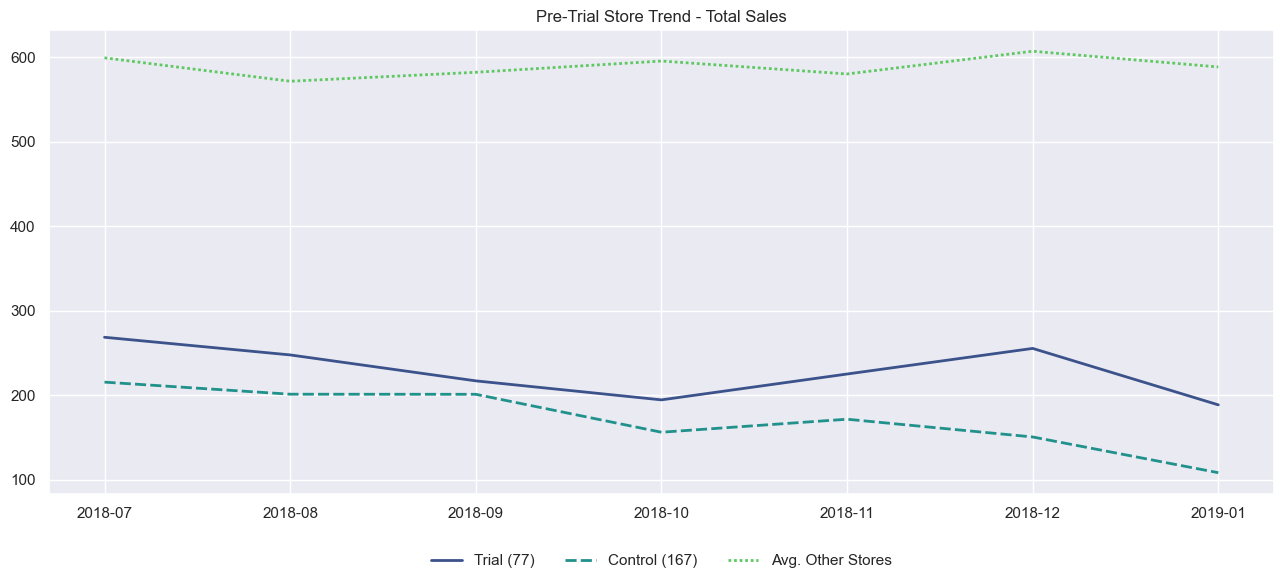

In [29]:
plot_pretrial_trends(trial_store=77, control_store=167, metric=0)

         Trial  Control  Others
2018-07     47       47    68.5
2018-08     46       34    68.2
2018-09     40       44    66.6
2018-10     36       32    67.9
2018-11     39       39    66.7
2018-12     43       36    69.4
2019-01     31       27    67.4


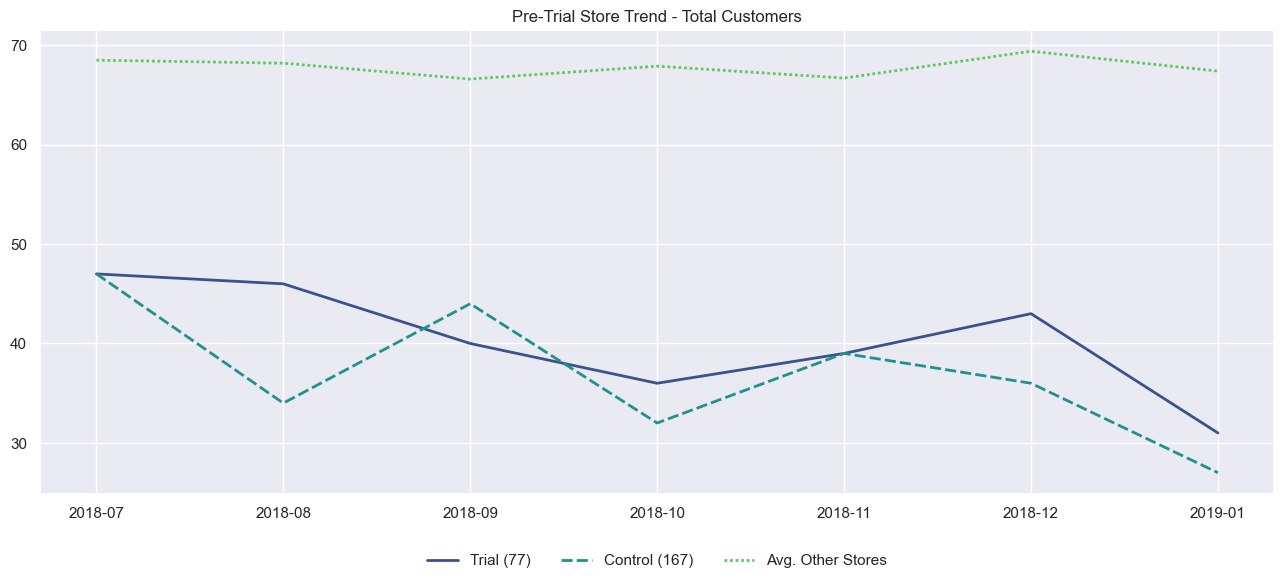

In [30]:
plot_pretrial_trends(trial_store=77, control_store=167, metric=1)

         Trial  Control  Others
2018-07  268.4    271.2   598.8
2018-08  247.5    260.7   571.2
2018-09  216.8    220.9   581.9
2018-10  194.3    159.3   595.3
2018-11  224.9    206.5   579.9
2018-12  255.2    265.4   606.5
2019-01  188.4    150.5   588.2


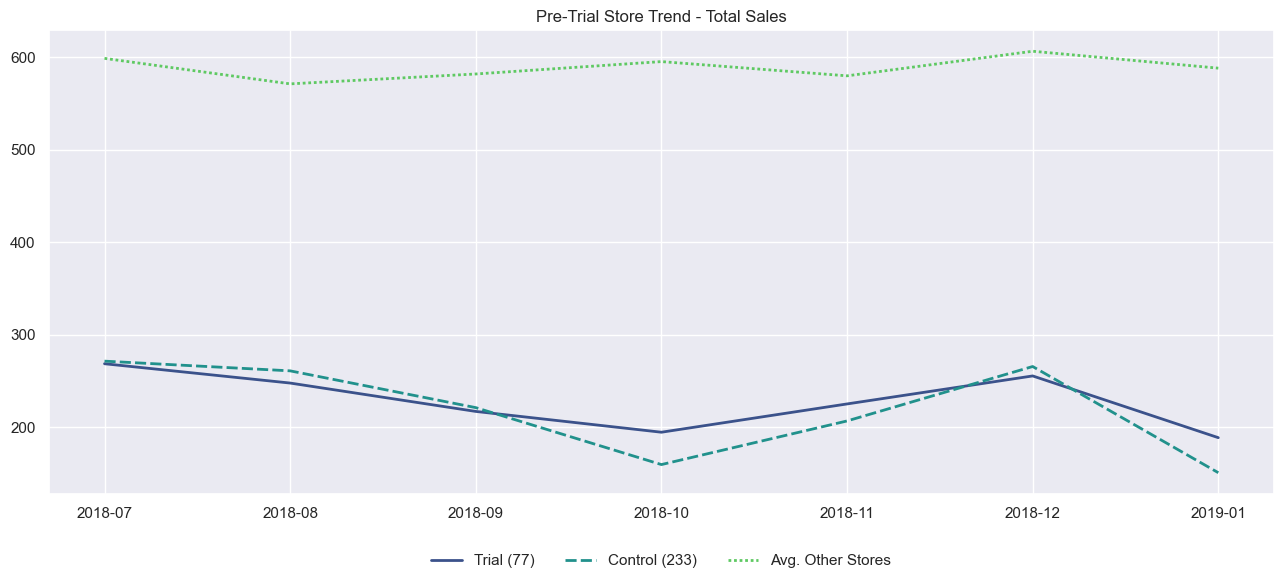

In [31]:
plot_pretrial_trends(trial_store=77, control_store=233, metric=0)

         Trial  Control  Others
2018-07     47       47    68.5
2018-08     46       44    68.2
2018-09     40       40    66.6
2018-10     36       32    67.9
2018-11     39       39    66.7
2018-12     43       43    69.4
2019-01     31       31    67.4


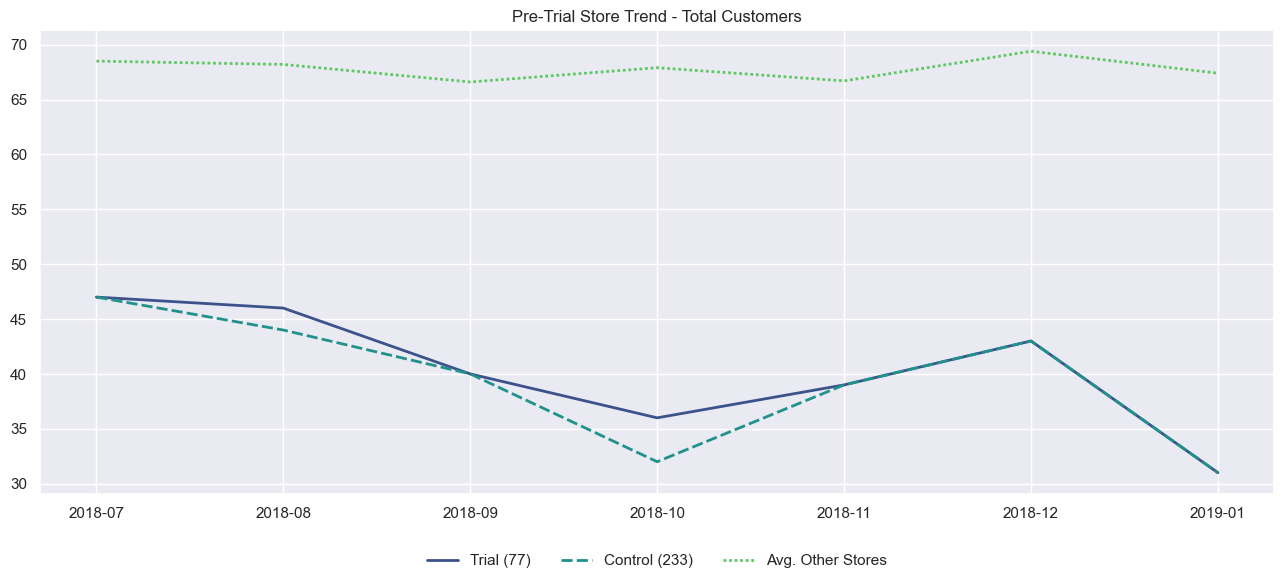

In [32]:
plot_pretrial_trends(trial_store=77, control_store=233, metric=1)

          Trial  Control  Others
2018-07  851.00    900.6   594.1
2018-08  726.85    738.7   567.4
2018-09  855.00    939.6   576.6
2018-10  898.80    914.0   589.6
2018-11  851.20    835.0   575.0
2018-12  812.20    799.8   602.3
2019-01  800.60    834.6   583.1


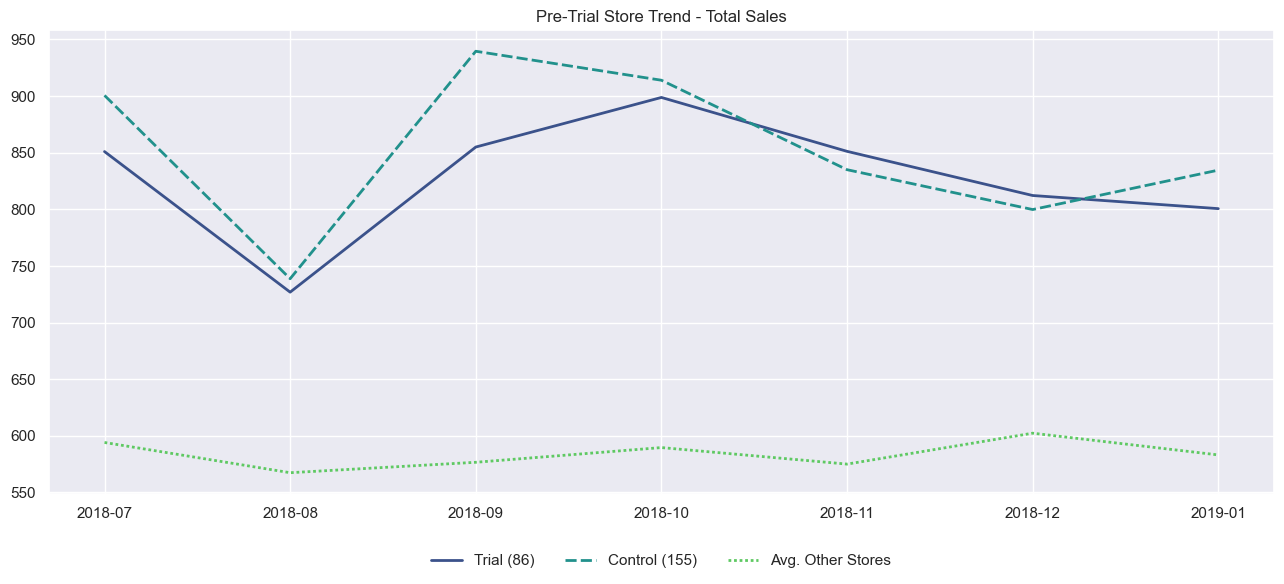

In [33]:
plot_pretrial_trends(trial_store=86, control_store=155, metric=0)

         Trial  Control  Others
2018-07     94       98    68.1
2018-08     92       88    67.9
2018-09    100       96    66.2
2018-10    105      105    67.3
2018-11     95       96    66.3
2018-12     93       91    69.0
2019-01     89       92    66.9


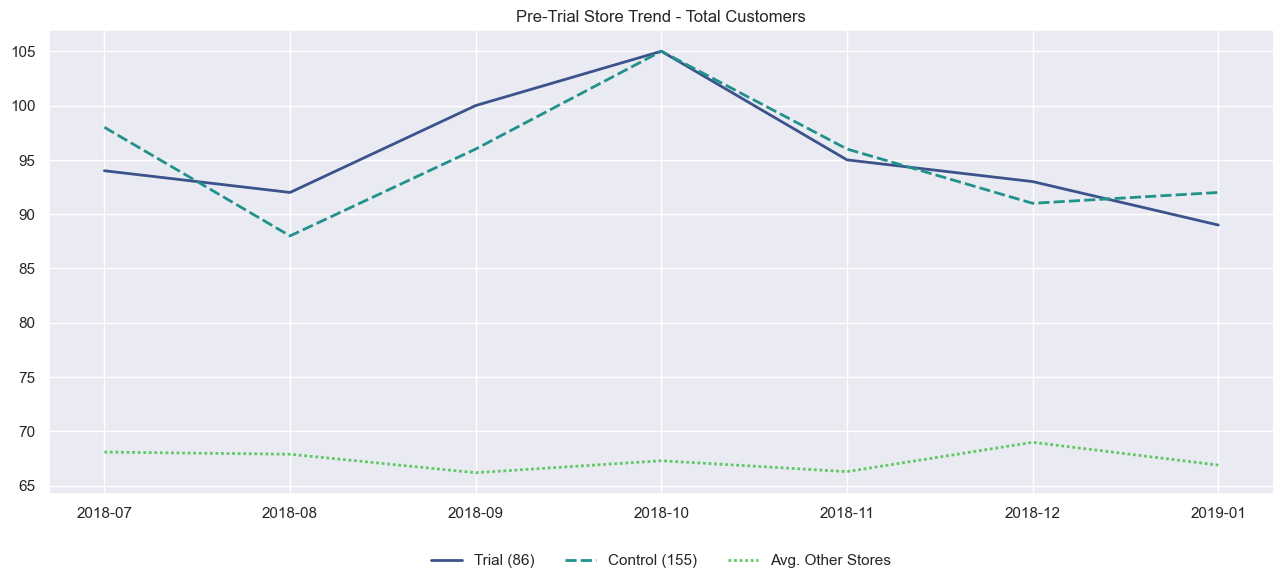

In [34]:
plot_pretrial_trends(trial_store=86, control_store=155, metric=1)

          Trial  Control  Others
2018-07  1218.2   895.60   592.7
2018-08  1242.2   935.25   564.7
2018-09  1361.8   880.40   574.9
2018-10  1270.8   759.20   588.8
2018-11  1311.4  1040.00   572.4
2018-12  1213.0   895.60   600.3
2019-01  1215.4   806.60   581.6


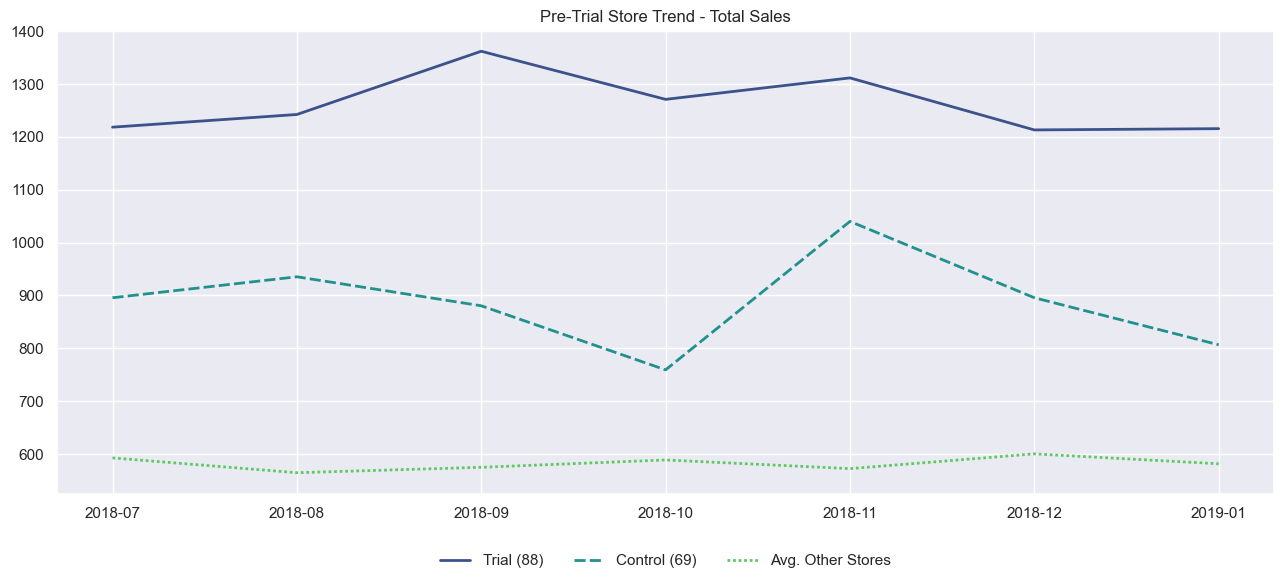

In [35]:
plot_pretrial_trends(trial_store=88, control_store=69, metric=0)

         Trial  Control  Others
2018-07    124      106    67.9
2018-08    125      112    67.6
2018-09    121       99    66.1
2018-10    120       88    67.3
2018-11    123      116    66.1
2018-12    120       99    68.8
2019-01    115       97    66.8


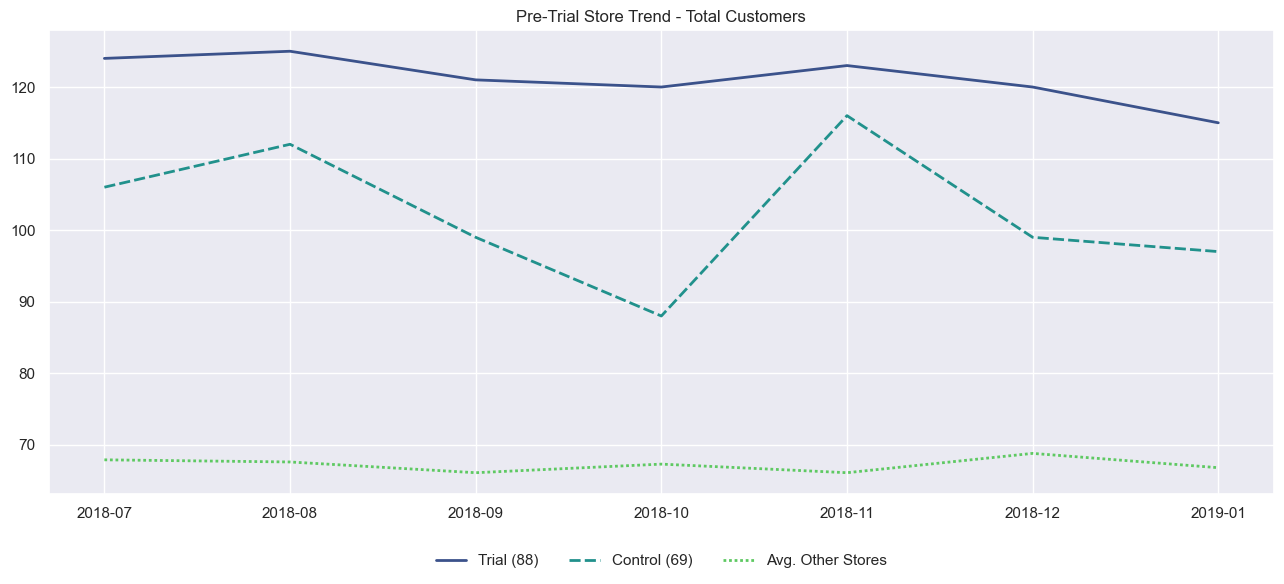

In [36]:
plot_pretrial_trends(trial_store=88, control_store=69, metric=1)

          Trial  Control  Others
2018-07  1218.2   1387.2   590.8
2018-08  1242.2   1321.9   563.2
2018-09  1361.8   1250.8   573.4
2018-10  1270.8   1287.1   586.7
2018-11  1311.4   1316.0   571.4
2018-12  1213.0   1234.4   599.0
2019-01  1215.4   1117.7   580.4


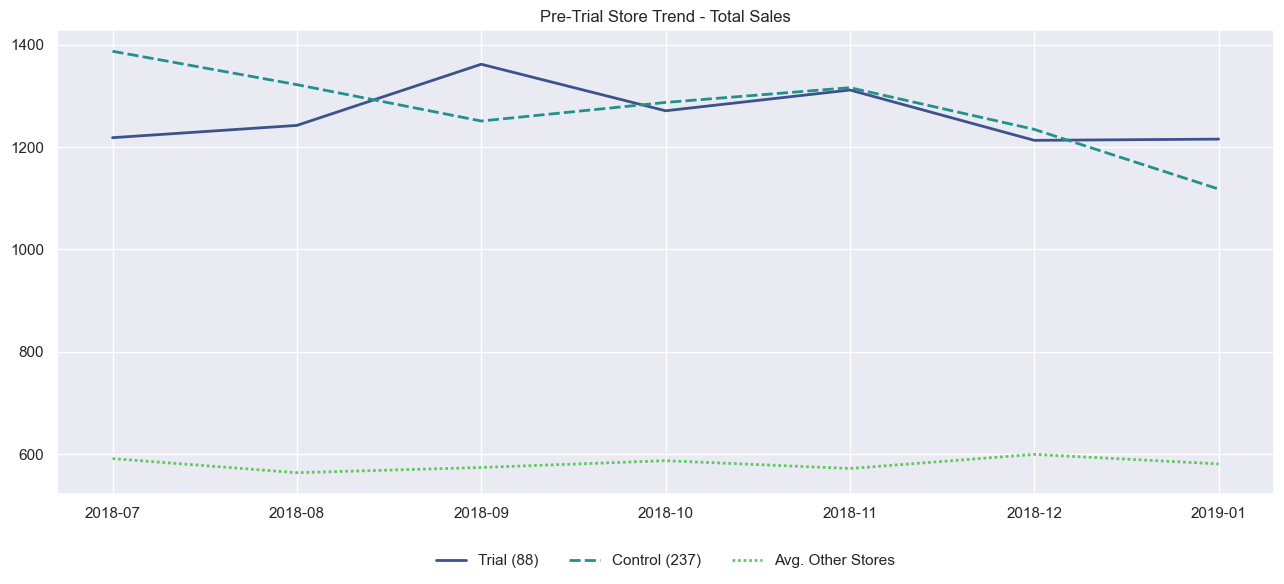

In [37]:
plot_pretrial_trends(trial_store=88, control_store=237, metric=0)

         Trial  Control  Others
2018-07    124      125    67.8
2018-08    125      132    67.6
2018-09    121      120    66.0
2018-10    120      118    67.2
2018-11    123      125    66.0
2018-12    120      121    68.8
2019-01    115      111    66.8


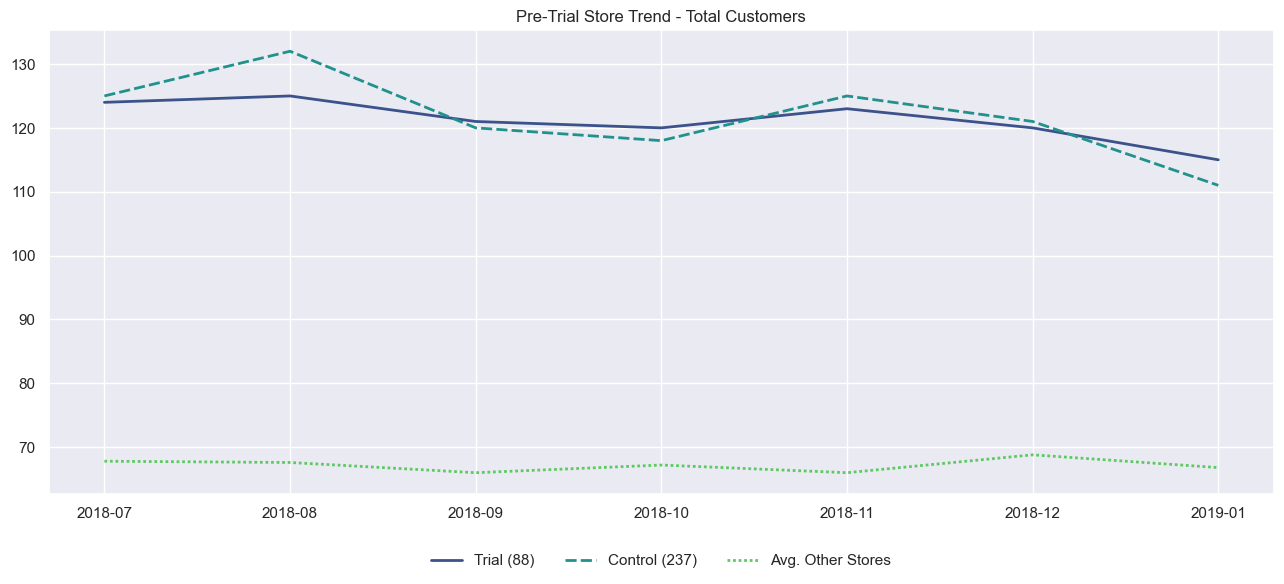

In [38]:
plot_pretrial_trends(trial_store=88, control_store=237, metric=1)

**Remarks**

+ Final Control Stores
    + Store 77 -> **Store 233**
    + Store 86 -> **Store 155**
    + Store 88 -> **Store 237**
+ Notice by looking at the pre-trial trends, Store 77 has monthly numbers lower than the average (other stores) while Stores 86 and 88 have monthly numbers higher than the average. This insight already shows that 77 could be situated in a location with smaller market while 86 and 88 could be situated in a relatively busy location.

## Trial assessment

Similar to checking pre-trial trends, let's only consider performance based on total sales and total customers.

In [39]:
def assess_trial(trial_store, control_store, metric=0):
    # Setup time periods
    all_months = df_main["YEARMONTH"].unique()
    pre_trial_period = all_months[:7]
    trial_period = all_months[7:10]

    # Select metric to consider
    relevant_metrics = [
        monthly_sales, 
        monthly_utrans, 
        monthly_avg_units_per_trans, 
        monthly_avg_uprice
    ]
    df_metric = relevant_metrics[metric]

    # Setup working dataframe
    all_store_record = df_metric.set_index("STORE_NBR").loc[[trial_store, control_store], all_months].transpose()
    all_store_record.columns = ["trial", "control"]

    # Calculate scale factor to scale control data based on pre-trial period
    ptp_record = all_store_record.loc[pre_trial_period]
    scale_factor = ptp_record["trial"].sum() / ptp_record["control"].sum()
    all_store_record["control_scaled"] = all_store_record["control"] * scale_factor

    # Divide records for suceeding calculations
    ptp_trial_store = all_store_record.loc[pre_trial_period]["trial"]
    ptp_control_store_scaled = all_store_record.loc[pre_trial_period]["control_scaled"]

    tp_trial_store = all_store_record.loc[trial_period]["trial"]
    tp_control_store_scaled = all_store_record.loc[trial_period]["control_scaled"]

    # Calculate standard deviation based on percentage difference during pre-trial period 
    ptp_pct_diff = ((ptp_trial_store - ptp_control_store_scaled).abs()).div(ptp_control_store_scaled)
    ptp_pct_diff_stdev = ptp_pct_diff.std()

    # Calculate confidence interval for control store
    # There are 8 months during the pre-trial period, hence use 7 degrees of freedom
    # The 5th and 95th percentile have equal magnitude but opposite signs because the t distribution is symmetric
    llimit_t, ulimit_t = t.ppf(0.05, df=7), t.ppf(0.95, df=7)
    tp_control_scaled_llimit = all_store_record["control_scaled"] * (1 + ptp_pct_diff_stdev * llimit_t)
    tp_control_scaled_ulimit = all_store_record["control_scaled"] * (1 + ptp_pct_diff_stdev * ulimit_t)

    # Collate results into dataframe
    df_result = pd.DataFrame({
        "actual":  all_store_record["trial"],
        "control_scaled": all_store_record["control_scaled"],
        "control_lower_limit": tp_control_scaled_llimit,
        "control_upper_limit": tp_control_scaled_ulimit
    })

    return df_result

In [40]:
def plot_trial_result(trial_store, control_store, metric=0):
    # Get dataframe of result
    df_result = assess_trial(trial_store, control_store, metric=metric)
    
    # Ensure period index will be read properly
    df_result.index = df_result.index.astype(str)
    
    # Draw plot
    fig, ax = plt.subplots(figsize=(13, 6))

    # Trial store plot
    ax.plot(
        df_result.index, 
        df_result["actual"], 
        color="darkblue", 
        linewidth=3, 
        linestyle="-", 
        label=f"Trial ({trial_store})",
        zorder=2
    )
    # Scaled control store plot
    ax.plot(
        df_result.index, 
        df_result["control_scaled"], 
        color="darkslategray", 
        linewidth=1.5, 
        linestyle="--", 
        label=f"Scaled Control ({control_store})",
        zorder=1
    )
    # Lower and upper limits plot
    ax.plot(
        df_result.index, 
        df_result["control_upper_limit"], 
        color="darkslategray", 
        linewidth=1.5, 
        linestyle=":", 
        label="90% Confidence Interval",
        zorder=1
    )
    ax.plot(
        df_result.index, 
        df_result["control_lower_limit"], 
        color="darkslategray", 
        linewidth=1.5, 
        linestyle=":", 
        label="",
        zorder=1
    )

    # Shade region of trial period
    ax.axvspan(xmin="2019-02", xmax="2019-04", color="lightgreen", alpha=0.5, label="Trial Period", zorder=0)

    # Setup layout of legend
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),
        ncol=4,
        frameon=False
    )

    # Setup labels
    plot_title_mapper = {
        0: "Total Sales",
        1: "Total Customers",
        2: "Avg Units per Transaction",
        3: "Avg Sales per Unit"
    }
    ax.set_title(f"Trial Assessment of Store {trial_store} by {plot_title_mapper.get(metric, "NaN")}")

    fig.tight_layout()

    metric_name = plot_title_mapper.get(metric, "NaN").replace(" ", "_").lower()
    fig.savefig(f"./static/assessment/ta_{metric_name}_ts{trial_store}_cs{control_store}.jpg", bbox_inches="tight", dpi=200)

### Store 77

In [41]:
TRIAL_STORE = 77
CONTROL_STORE = 233

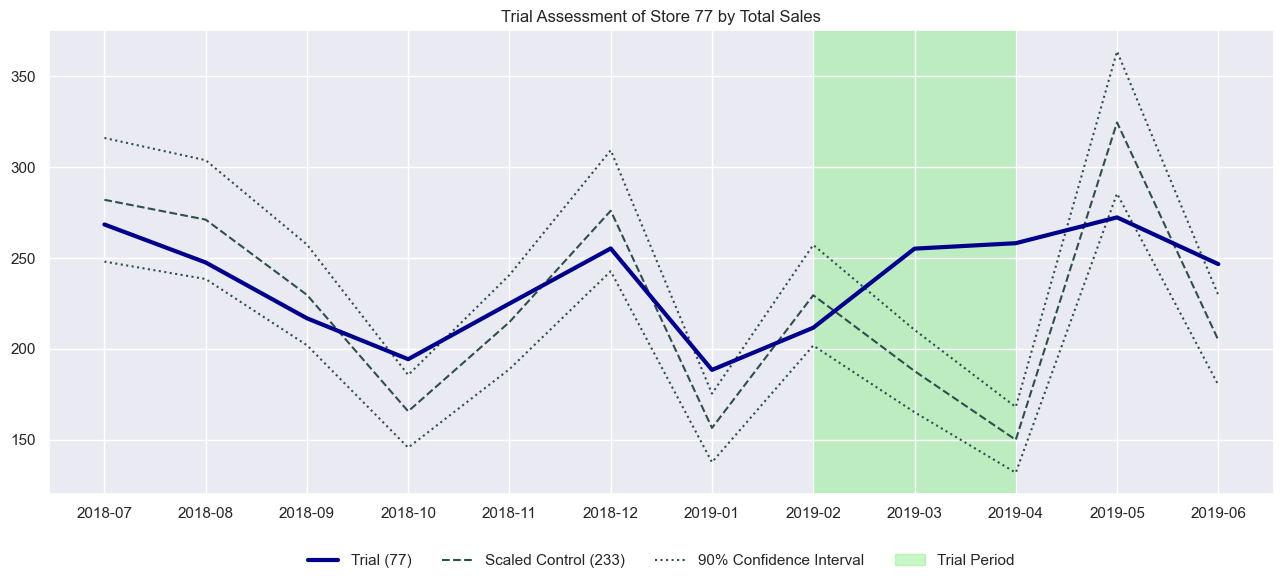

In [42]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=0)

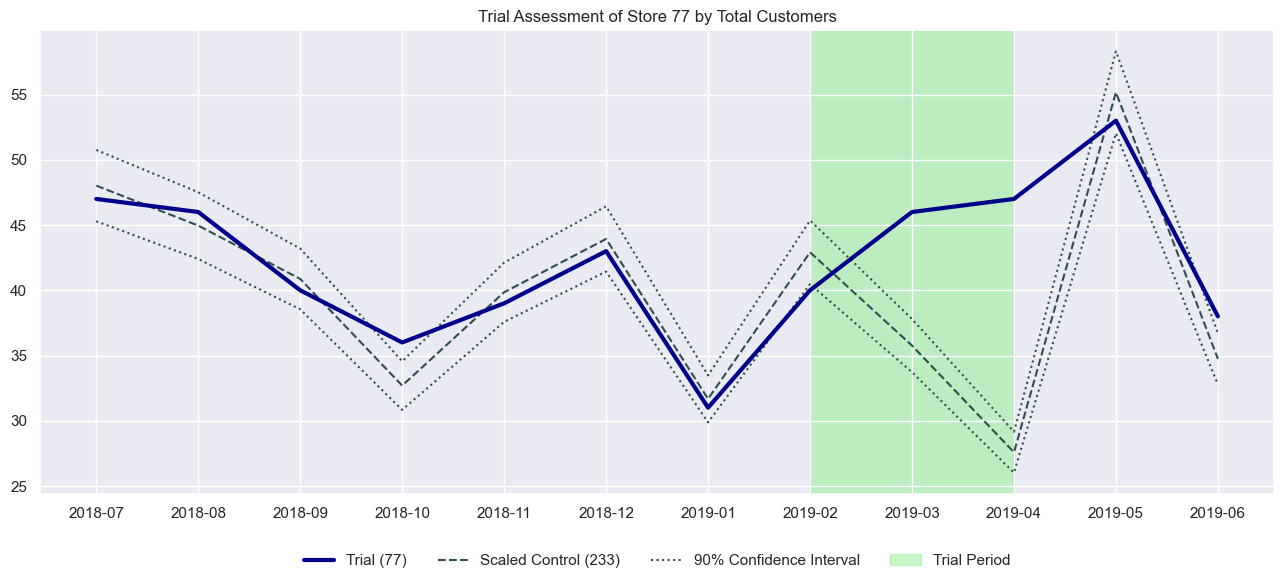

In [43]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=1)

### Store 86

In [44]:
TRIAL_STORE = 86
CONTROL_STORE = 155

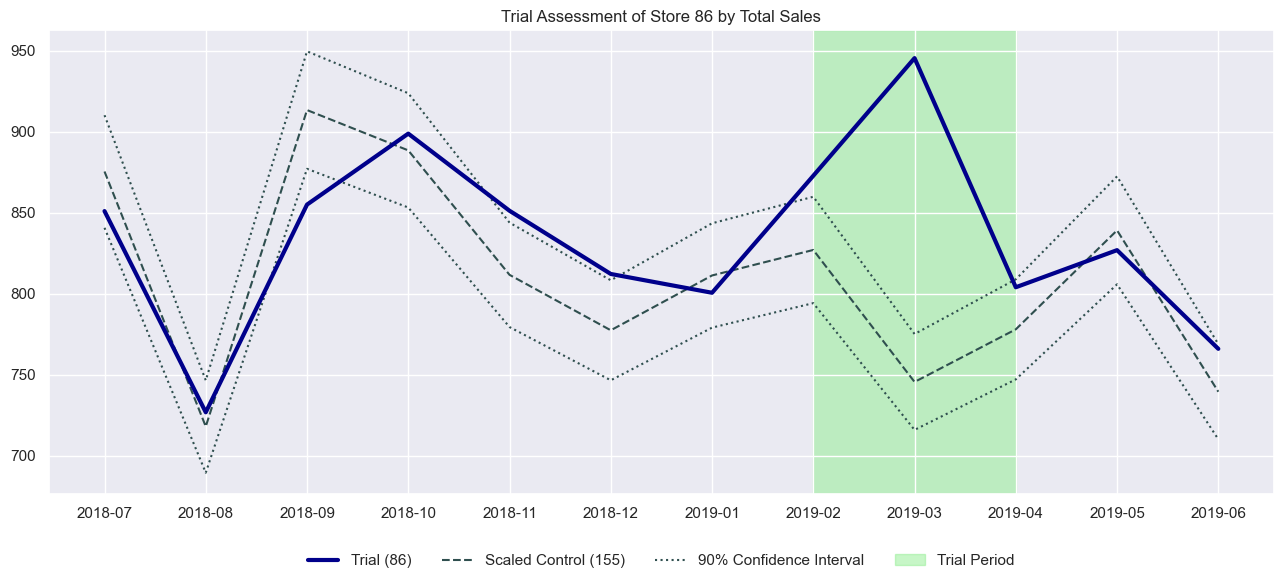

In [45]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=0)

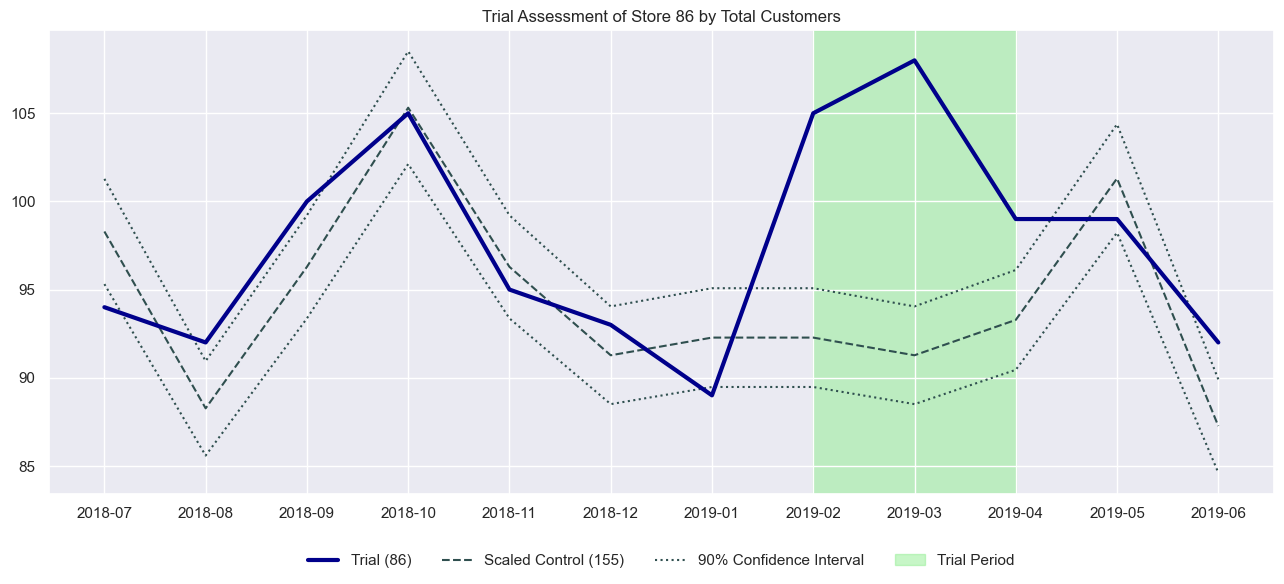

In [46]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=1)

### Store 88

In [47]:
TRIAL_STORE = 88
CONTROL_STORE = 237

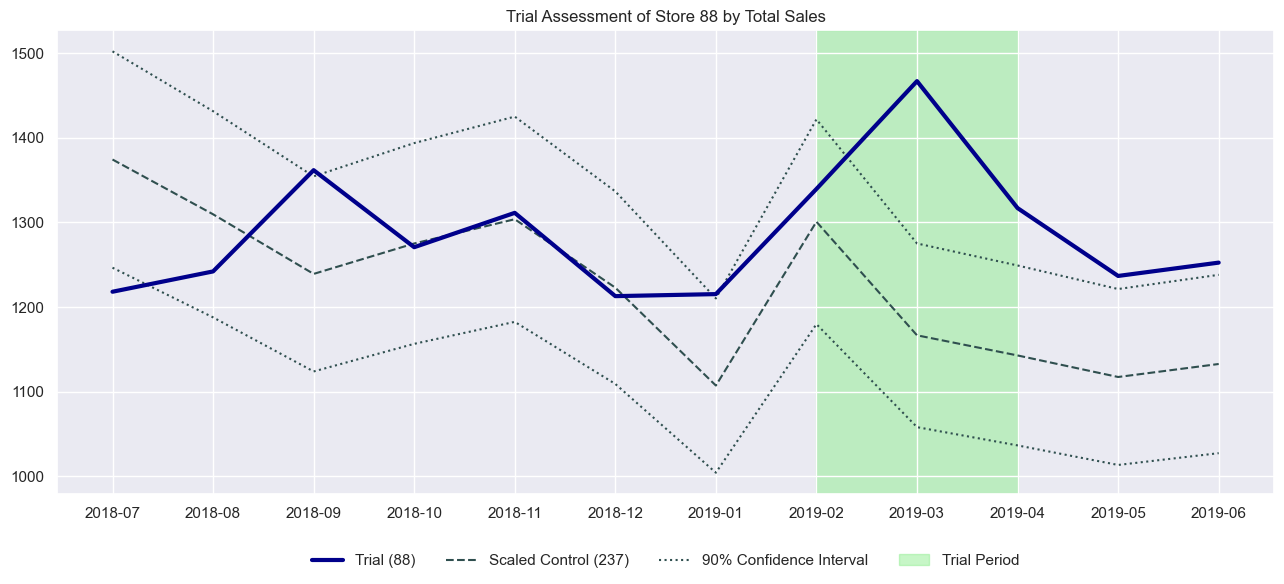

In [48]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=0)

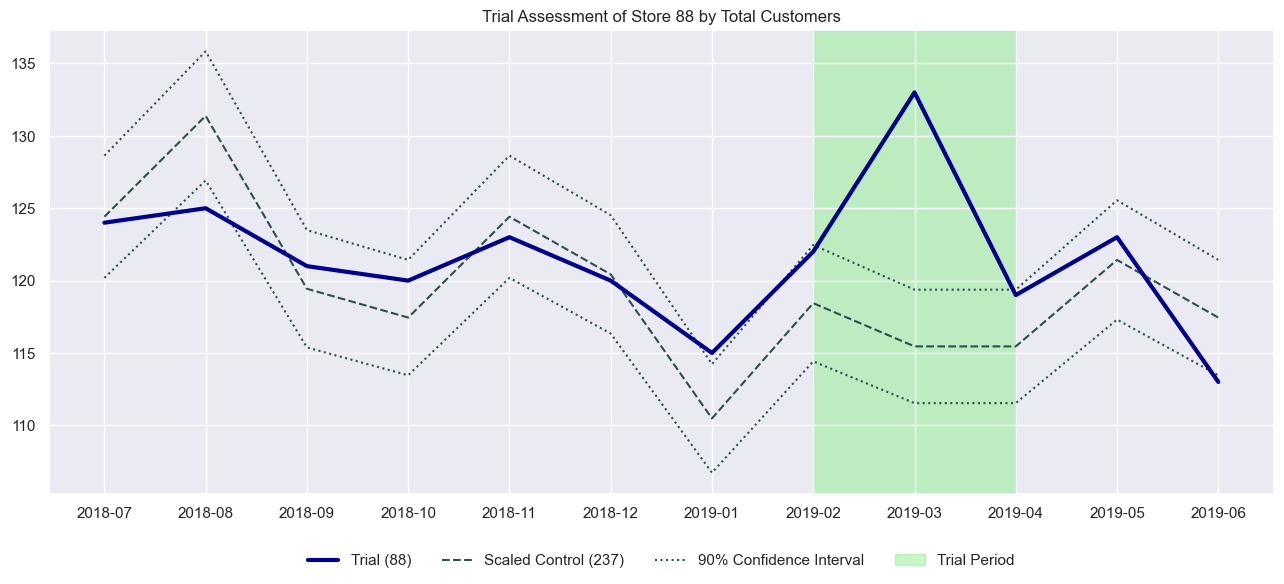

In [49]:
plot_trial_result(trial_store=TRIAL_STORE, control_store=CONTROL_STORE, metric=1)

**Remarks**
+ Total Sales
    + Store 77 - The new layout created more sales than expectations in 2 out of the 3 month trial.
    + Store 86 - The new layout created more sales in the middle of the trial period, but eventually returned to expected normal levels afterwards.
    + Store 88 - The new layout created more sales than expectations in 2 out of the 3 month trial, and even keeping this up after the trial period.
+ Total Customers
    + Store 77 - The new layout attracted more customers than expectations in 2 out of the 3 month trial.
    + Store 86 - The new layout attracted more customers than expectations throughout the whole trial period.
    + Store 88 - The new layout attracted more customers in the middle of the trial period, but eventually returned to expected normal levels afterwards.
+ Generally speaking, the new layout was **successful** in terms of creating sales.
+ The success wasn't the case for Store 86 as we have seen more impact in the number of customers than with sales. This could mean the customers only come for discounted items.
+ The nuance for Store 88 of achieving more sales but generally maintaining customer count could mean the new layout successfully convince existing customers to buy more products.
+ Additional questions could be raised for clarity, especially on how the trial was exactly implemented in Store 86.
+ Since our conclusion only depends on our chosen approach and metrics (total sales and total customers), additional exploration and tweaks could be done to get more confidence in giving a conclusion to the result of the new layout in sales.